In [20]:
#Analisando Ações com Python usando Yahoo Finance
#1.0.0 Estas são as bibliotecas necessárias para a análise dos dados que vamos usar.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
today = date.today()
#1.0.1 - Essas são as bibliotecas para analisar os dados obtidos na Web do site Yahoo Finance. 
#Essa faz a varredura dos dados
import pandas_datareader.data as web
#Essa se conecta ao portal yfinance.
import yfinance as yf
#1.0.2 - Essa é a biblioteca para analisar os fundamentos das empresas selecionadas
import fundamentos as fts
#1.1.0 - Assim percorremos todos os dados obtidos no Yahoo Finance.
yf.pdr_override()
#2.0 - O comando web.get_data_yahoo nos permite obter os dados da Bovespa através de sua sigla. 
ibov = web.get_data_yahoo('^BVSP')
#2.0.1 - Outra biblioteca para análise estatística, voltada para conseguir comparar os gráficos do CDI/IBOV
import seaborn as sns; sns.set()
#Obtendo dados da Base central do Banco do Brasil
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df
#Estes são exemplos de informações que podem ser consultados na base de dados do Banco Central
ipca = consulta_bc(433)
igpm = consulta_bc(189)
selic_meta = consulta_bc(432)
reservas_internacionais = consulta_bc(13621)
pnad = consulta_bc(24369)
cdi = consulta_bc(12)

[*********************100%***********************]  1 of 1 completed


In [17]:
abev3  = web.get_data_yahoo('ABEV3.SA', start=datetime.datetime(2020,1,1), end=today)

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Preço')

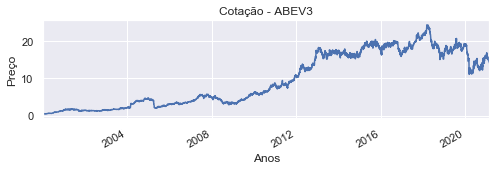

In [11]:
cotaabev3 = abev3["Close"].plot(figsize=(8,2))
plt.title("Cotação - ABEV3")
plt.xlabel("Anos")
plt.ylabel("Preço")

Date
2020-01-02    1.802758
2020-01-03   -0.105543
2020-01-06    0.848355
2020-01-07    0.052495
2020-01-08   -0.628606
2020-01-09   -0.947370
2020-01-10    0.371943
2020-01-13    1.479127
2020-01-14   -0.520835
2020-01-15   -1.263157
dtype: float64

Text(0, 0.5, 'Volatilidade %')

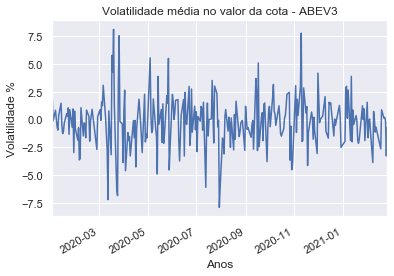

In [21]:
pct_abev3 = (abev3.Close / abev3.Open).apply(lambda x:x-1)*100
display(pct_abev3.head(10))
pct_abev3.plot()
plt.title("Volatilidade média no valor da cota - ABEV3")
plt.xlabel("Anos")
plt.ylabel("Volatilidade %")

In [23]:
ftsabev3 = fts.get_fundamentos('ABEV3')

In [25]:
type(ftsabev3)

pandas.core.frame.DataFrame

In [27]:
print(ftsabev3)

                       Caixa                                    Dividendos  \
ABEV3 Aplicações Financeiras Dinheiro em Caixa Disponibilidades         DY   
Data                                                                         
2012                     NaN             48155            48155        NaN   
2013                     NaN            137021           137021        NaN   
2014               1316089.0           2543654          3859743     0.5462   
2015               2597469.0           1944872          4542341     0.4713   
2016                648951.0           1405387          2054338     0.4075   
2017                631637.0           2017034          2648671     0.3957   
2018               1037821.0           2273875          3311696        NaN   
2019               1082865.0           2657537          3740402        NaN   
2020                  9172.0           4547817          4556989        NaN   

                               Dívida                          

In [35]:
df = ftsabev3